In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from PIL import Image, ImageDraw
import os
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
actual_st = pd.read_parquet("./stations/actual_stations.parquet")
actual_st['sis'] = actual_st['sis'].astype(int)
all_st = pd.read_parquet("./stations/all_stations.parquet")
all_st['sis'] = all_st['sis'].astype(int)
df_merge = pd.merge(actual_st, all_st, on='sis')
df_merge['lon_y'] = df_merge['lon_y'].replace(',', '.', regex=True).astype('float')
# actual_st['lon_e'] = actual_st['lon_y'].apply(lambda x: x if x>0 else x+360)
df_merge['lat_y'] = df_merge['lat_y'].replace(',', '.', regex=True).astype('float')
df_merge['diff_lat'] = df_merge['lat_x'] - df_merge['lat_y']
df_merge['diff_lon'] = df_merge['lon_x'] - df_merge['lon_y']
# actual_st = actual_st[actual_st.columns.to_list()[]]
actual_st = actual_st.sort_values(by=['lat'], ascending=False)
df_merge = df_merge.sort_values(by=['lat_x'], ascending=False)
actual_st.reset_index(drop=True, inplace=True)
actual_st.head()

,name,sis,lat,lon
0,Фуглойкалвен фьорд,1034,70.31700,20.15000
1,Торсваг фьорд,1033,70.24556,19.50028
2,Верхнедвинск,26554,55.82083,27.94000
3,Полоцк,26653,55.47472,28.75167
4,Шарковщина,26643,55.36306,27.45667


In [3]:
df_merge = df_merge[['name_x', 'sis', 'lat_x', 'lon_y', 'name_y', 'country']]
df_merge.columns = ['name', 'sis', 'lat', 'lon', 'name_en', 'country']
df_merge.head()


,name,sis,lat,lon,name_en,country
2,Фуглойкалвен фьорд,1034,70.31700,20.2,Fugloykalven Fyr,Norway
1,Торсваг фьорд,1033,70.24556,19.5,Torsvag Fyr,Norway
35,Верхнедвинск,26554,55.82083,27.9,Верхнедвинск,Беларусь
38,Полоцк,26653,55.47472,28.8,Полоцк,Беларусь
34,Шарковщина,26643,55.36306,27.5,Шарковщина,Беларусь


In [4]:
actual_st = df_merge

In [5]:
actual_st

,name,sis,lat,lon,name_en,country
2,Фуглойкалвен фьорд,1034,70.317000,20.2,Fugloykalven Fyr,Norway
1,Торсваг фьорд,1033,70.245560,19.5,Torsvag Fyr,Norway
35,Верхнедвинск,26554,55.820830,27.9,Верхнедвинск,Беларусь
38,Полоцк,26653,55.474720,28.8,Полоцк,Беларусь
34,Шарковщина,26643,55.363060,27.5,Шарковщина,Беларусь
32,Витебск,26666,55.252780,30.3,Витебск город,Беларусь
33,Лынтуры,26645,55.048890,26.3,Лынтупы,Беларусь
37,Докшицы,26657,54.887220,27.8,Докшицы,Беларусь
36,Лепель,26659,54.880000,28.7,Лепель,Беларусь
28,Сенно,26668,54.804440,29.7,Сенно,Беларусь


In [6]:
lon = actual_st['lon'].values
lat = actual_st['lat'].values
lon[:2], lat[:2]

(array([20.2, 19.5]), array([70.317  , 70.24556]))

In [7]:
lon.max(), lon.mean(), lon.min(), (lon.max()+lon.min())/2

(78.7, 38.79651162790697, 19.5, 49.1)

In [8]:
margin = 0
FIGDPI = 100
lons_min = lon.min() - margin
lons_max = lon.max() + margin if lon.max() < 180 else lon.max()
lats_min = lat.min() - margin
lats_max = lat.max() + margin
lons_min, lons_max, lats_min, lats_max

(19.5, 78.7, 38.45, 70.317)

In [9]:
# TODO Rename this here and in `draw_map`
def _extracted_from_draw_map_19(m, 
                                projection, 
                                zoom,
                                lat,
                                lon,
                                tile,
                                slice_tile,
                                img_write=False,
                                plot_scatter=False,
                                names=[]
                                ):
        # plt.rcParams['figure.dpi'] = 100
        # # plt.rcParams['figure.figsize'] = (10.24, 10.24)
        # plt.rcParams['figure.figsize'] = (2.56 * zoom, 2.56 * zoom)
        # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
        #     hspace = 0, wspace = 0)
        # plt.margins(0,0)
        plt.axis('off')
        # m.drawcoastlines(linewidth=0.5, color='blue')
        # m.fillcontinents(color='gray', lake_color='aqua')
        # m.drawcountries(linewidth=1, color='red')

        # m.drawmapboundary(fill_color='aqua')
        # m.fillcontinents(color='gray',lake_color='white',zorder=2)
        m.fillcontinents(color='coral',lake_color='white', zorder=1)
        m.drawcountries(zorder=2)
        # m.drawcoastlines()
        
        # m.drawmapboundary(fill_color='aqua')
        # m.drawparallels(np.arange(-90., 91., 15.))
        # m.drawmeridians(np.arange(-180., 181., 30.))
        # m.shadedrelief()
        # print(f"LON_LAT: {lon[0], lat[0]}")
        lons, lats = m(lon, lat, 
                #        inverse=True
                       )
        # print(lons[0], lats[0])
        if plot_scatter:
                x, y = m(lon, lat, 
                        #        inverse=True
                               )        
                m.scatter(x, y, 
                          marker = 'o', 
                          color='yellow', 
                          zorder=1, 
                          label=1,
                          s=zoom+1
                          )
                # plt.title(names)
        # if projection=='merc':
        #     plt.title("Mercator Projection")
        # #     plt.show()
        # elif projection=='npstere':
        #     plt.title("North Pole Projection")
        # #     plt.show()
        if img_write==True:
                os.makedirs(f'./tiles/{projection}/{tile}/', exist_ok=True)
                plt.savefig(
                        f'./tiles/{projection}/{tile}/{slice_tile}.png', 
                        bbox_inches='tight', 
                        pad_inches = 0)
        return m
def draw_map(
        lats_min=-80,
        lats_max=80,
        lons_min=-180,
        lons_max=180,
        resolution='i',
        projection='merc',
        zoom=1,
        lat=[0],
        lon=[0],
        tile='0',
        slice_tile='0',
        img_write=False,
        plot_scatter=False,
        names=[]
        ):        
        # fig = plt.gcf()
        # fig.get_size_inches()
        # fig.dpi
        global FIGDPI
        plt.rcParams['figure.dpi'] = FIGDPI
        # plt.rcParams['figure.figsize'] = (10.24, 10.24)
        plt.rcParams['figure.figsize'] = (2.56 * zoom, 2.56 * zoom)
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        plt.margins(0,0)
        if projection=='merc':
                m = Basemap(
                        projection=projection,
                        llcrnrlat=lats_min,
                        urcrnrlat=lats_max,
                        llcrnrlon=lons_min,
                        urcrnrlon=lons_max,
                        # lat_ts=10,
                        resolution=resolution,
                        )
                return _extracted_from_draw_map_19(m, projection, zoom,
                                                   lat, lon,
                                                   tile, slice_tile, 
                                                   img_write=img_write,
                                                   plot_scatter=plot_scatter,
                                                   names=names
                                                   )
        elif projection=='npstere':
                m = Basemap(
                        projection='npstere',
                        resolution=resolution,
                        lon_0=0.,
                        boundinglat=10,                       
                )
                return _extracted_from_draw_map_19(m, projection, zoom,
                                                   lat, lon,
                                                   tile, slice_tile, 
                                                   img_write=img_write,
                                                   plot_scatter=plot_scatter,
                                                   names=names
                                                   )

In [10]:
tile = 3
if tile == 3:
    step_x, step_y = int(360/8), int(160/8)
    step_y = 20
    step_x = 20
step_x, step_y

(20, 20)

In [11]:
st_lats_lons = actual_st[(actual_st['lon'] >= 45)\
    & (actual_st['lon'] <= 45+step_y)\
        & (actual_st['lat'] >= 20)\
            & (actual_st['lat'] <= 20+step_x)]#.loc[:, ['lat', 'lon']].values
st_lats_lons

,name,sis,lat,lon,name_en,country
14,Истису,37883,39.93333,46.0,Истису,Азербайджан
10,Сисиан,37897,39.50833,46.0,Сисиан,Армения
13,Биласувар,37972,39.46667,48.6,Биласувар,Азербайджан
15,Нефтчала,37925,39.40000,49.2,Нефтчала,Азербайджан
11,Мегри,37958,38.90028,46.2,Мегри,Армения
16,Ланкаран аэропорт,37985,38.73333,48.8,Ланкаран аэропорт,Азербайджан
17,Астара,37989,38.45000,48.9,Астара,Азербайджан


In [12]:

# st_lats_lons[:,0], st_lats_lons[:,1]

['Торсваг фьорд']
0 : 0 20 60 80
(1, 2)
[]
1 : 0 20 40 60
[]
2 : 0 20 20 40
[]
3 : 0 20 0 20
['Фуглойкалвен фьорд']
4 : 20 40 60 80
(1, 2)
['Верхнедвинск', 'Полоцк', 'Шарковщина', 'Витебск', 'Лынтуры', 'Докшицы', 'Лепель', 'Сенно', 'Орша', 'Горки', 'Борисов', 'Минск', 'Лида', 'Березино', 'Гродно', 'Кличев', 'Марьина Горка', 'Славгород', 'Костюковичи', 'Бобруйск', 'Барановичи', 'Слуцк', 'Жлобин', 'Гомель', 'Житковичи', 'Пинск', 'Брест', 'Мозырь', 'Брагин', 'Симферополь']
5 : 20 40 40 60
(30, 2)
['Гыоытапа']
6 : 20 40 20 40
(1, 2)
[]
7 : 20 40 0 20
[]
8 : 40 60 60 80
['Сухуми', 'Лентехи', 'Цагери', 'Амбролаури', 'Зугдиди', 'Пасанаури', 'Сачхере', 'Ткибули', 'Сенаки', 'Кутаиси', 'Самтредиа', 'Поти', 'Ахалгори', 'Тианети', 'Дусети', 'Мта-Сабуети', 'Ципа', 'Хашури', 'Гори', 'Телави', 'Зекарский перевал', 'Боржоми', 'Лагодехи', 'Гурджаани', 'Сагареджо', 'Тбилиси АМС', 'Закаталы', 'Ахалцихе', 'Хуло', 'Батуми I', 'Годердзский перевал', 'Цалка', 'Гардабани', 'Болниси', 'Ахалкалаки', 'Степанаван

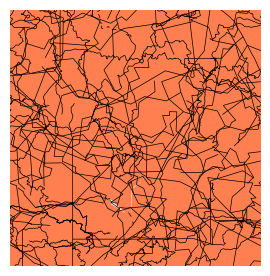

In [13]:
i=0
for tile_x in range(0, 90, step_x):
    for tile_y in reversed(range(0, 80, step_y)):
        df = actual_st[(actual_st['lon'] >= tile_x)\
            & (actual_st['lon'] <= tile_x+step_x)\
                & (actual_st['lat'] >= tile_y)\
                    & (actual_st['lat'] <= tile_y+step_y)]
        st_lats_lons = df.loc[:, ['lat', 'lon']].values
        names = df['name'].to_list()
        print(names)
        print(i, ":", tile_x, tile_x+step_x, tile_y, tile_y+step_y)
        if st_lats_lons.shape[0] != 0:
            print(st_lats_lons.shape)
            map_ = draw_map(
                int(tile_y),
                int(step_y + tile_y),
                int(tile_x),
                int(step_x + tile_x),
                projection='merc',
                resolution='i',
                zoom=1,
                lat=st_lats_lons[:,0],
                lon=st_lats_lons[:,1],
                tile=str(tile),
                slice_tile=str(i),
                img_write=True,
                plot_scatter=True,
                # names=names
            )
            del map_
        else:
            map_ = draw_map(
                int(tile_y),
                int(step_y + tile_y),
                int(tile_x),
                int(step_x + tile_x),
                projection='merc',
                resolution='c',
                zoom=1,
                # lat=st_lats_lons[:,0],
                # lon=st_lats_lons[:,1],
                tile=str(tile),
                slice_tile=str(i),
                img_write=True,
            )       
            del map_     
        i += 1

In [ ]:
img = Image.open("./tiles/merc/3/0.png")
img.size

In [ ]:
stop!










In [ ]:
img = Image.open(f'./test_proj_{projection}.png')
# LOC_1, LOC_2 = -7, -6
print("MAP_SIZE: ", map_.lonmin, map_.lonmax, map_.latmin, map_.latmax)
st_lats_lons = df_filter[(actual_st['lon'] >= map_.lonmin)\
    & (df_filter['lon'] <= map_.lonmax)\
        & (df_filter['lat'] >= map_.latmin)\
            & (df_filter['lat'] <= map_.latmax)].loc[:, ['lat', 'lon']].values
# st_lats_lons.shape
from tqdm import tqdm
plt.rcParams['figure.figsize'] = (6,6)
draw = ImageDraw.Draw(img)
for lat_st, lon_st in tqdm(st_lats_lons):
    xx, yy = map_(lon_st, lat_st)
    lon_st, lat_st = map_(xx, yy, inverse=True)
    x_1 = (img.size[0] / (map_.lonmax - map_.lonmin)) * (lon_st - map_.lonmin)
    y_1 = (img.size[1] / (map_.latmax - map_.latmin)) * (map_.latmax - lat_st)
    draw.ellipse(((x_1) - PAD, (y_1) - PAD, (x_1) + PAD, (y_1) + PAD), outline = 'orange', fill =None, width=2)
plt.imshow(img)
plt.xticks(range(0, img.size[0], 15), rotation=90);
plt.yticks(range(0, img.size[1], 15));
# plt.grid(True)
plt.title(f"Country: {country_act}")
plt.show()
img.size, img.size[0]/img.size[1], img.size[1]/img.size[0]